E004. A partir de statage.csv, usando ipywidgets, escribe un notebook que muestre la mediana de la altura frente a la edad con los siguientes controles:
- Una lista desplegable o botones de radio para elegir entre hombres y mujeres.
- Casillas de selección (Checkbox) para mostrar también el percentil 75.

Al cambiar el valor de cualquiera de los controles, se actualizará el gráfico.


In [ ]:
# UPDATED: 19/11/2024

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
# google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# path = "./"
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/"
datos = pd.read_csv(path + "statage.csv", sep = ",")
datos.head()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,24.0,0.941524,86.452201,0.040322,79.910844,80.729773,81.991714,84.102892,86.452201,88.805249,90.926191,92.196879,93.022654
1,1,24.5,1.007208,86.861609,0.040396,80.260371,81.088685,82.364010,84.494706,86.861609,89.228048,91.357530,92.631767,93.459230
2,1,25.5,0.837251,87.652473,0.040578,81.005294,81.834452,83.113871,85.258877,87.652473,90.056755,92.229661,93.534066,94.382780
3,1,26.5,0.681493,88.423264,0.040723,81.734157,82.564061,83.847162,86.005173,88.423264,90.862604,93.076082,94.408849,95.277617
4,1,27.5,0.538780,89.175492,0.040833,82.448456,83.278986,84.565344,86.735069,89.175492,91.647114,93.898271,95.257541,96.145118


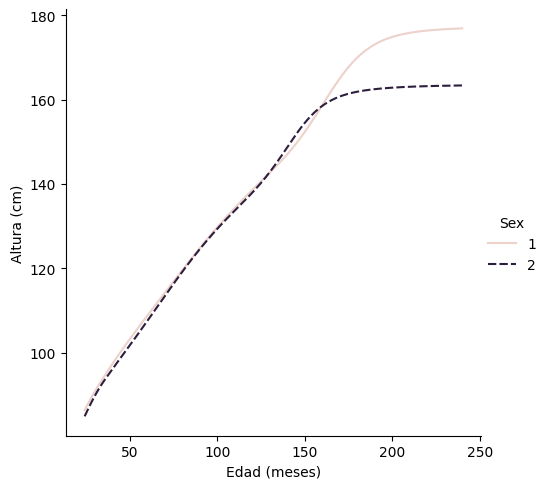

In [ ]:
plot = sns.relplot(
    datos,
    kind = 'line',
    x = "Agemos",
    y = "M",
    hue = "Sex",
    style = "Sex"
)

plot.set_axis_labels("Edad (meses)", "Altura (cm)")

In [ ]:
hombres = datos[datos.Sex == 1]
mujeres = datos[datos.Sex == 2]

In [ ]:
# Profe

@interact(P75 = False, Mostrar = [('Niños', 1), ('Niñas', 2), ('Niñ@s', 3)])
def mostrarGrafico(P75, Mostrar):

    if Mostrar == 1:
        # recogemos el valor de retorno para poder enviar el gráfico de P75 al mismo subplot
        axes = sns.lineplot(hombres, x = 'Agemos', y = 'M')
        if P75:
            sns.lineplot(hombres, x = 'Agemos', y = 'P75', ax = axes)

    if Mostrar == 2:
        axes = sns.lineplot(mujeres, x = 'Agemos', y = 'M')
        if P75:
            sns.lineplot(mujeres, x = 'Agemos', y = 'P75', ax = axes)

    if Mostrar == 3:
        # si mostramos los dos sexos, usamos subplots
        # las funciones a nivel de Figure devuelven un facetgrid, que contiene los axes
        # faltaría ajustar la leyenda
        f = sns.relplot(datos, x = 'Agemos', y = 'M',  hue = 'Sex', col = 'Sex')
        if P75:
            sns.lineplot(hombres, x = 'Agemos', y = 'P75', ax = f.axes[0,0])
            sns.lineplot(mujeres, x = 'Agemos', y = 'P75', ax = f.axes[0,1])


    plt.show()

interactive(children=(Checkbox(value=False, description='P75'), Dropdown(description='Mostrar', options=(('Niñ…

In [ ]:
# ChatGPT

@interact(
    sex=widgets.Dropdown(
        options=[("Hombre", 1), ("Mujer", 2)],
        description="Sexo:"
    ),
    show_percentile=widgets.Checkbox(
        value=False,
        description="Mostrar percentil 75"
    )
)
def cargarLine(sex, show_percentile):
    """
    Filtra los datos por sexo y muestra un gráfico interactivo de altura frente a edad,
    incluyendo la mediana y opcionalmente el percentil 75.
    """
    # Filtrar datos por sexo
    parcial = datos[datos["Sex"] == sex]

    if parcial.empty:
        print(f"No hay datos disponibles para el sexo seleccionado (Sex = {sex})")
        return


    # Agrupar y calcular estadísticas
    medianas = parcial["M"]
    percentil_75 = parcial["P75"]


    # Configurar el gráfico
    plt.figure(figsize=(10, 6))
    # plt.plot(medianas.index, medianas, label="Mediana", color="blue", marker="o")
    sns.lineplot(data=parcial, x="Agemos", y="M", label="Mediana", color="blue", marker="o")

    if show_percentile:
        # plt.plot(percentil_75.index, percentil_75, label="Percentil 75", color="orange", linestyle="--", marker="x")
        sns.lineplot(data=parcial, x="Agemos", y="P75", label="Percentil 75", color="orange", linestyle="--", marker="x")


    # Etiquetas y formato
    plt.title("Altura frente a Edad", fontsize=16)
    plt.xlabel("Edad (meses)", fontsize=12)
    plt.ylabel("Altura (cm)", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--")
    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='Sexo:', options=(('Hombre', 1), ('Mujer', 2)), value=1), Checkbox(…